In [57]:
# Load libraries
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
data = pd.read_csv('E:/project/dd.csv') #reading csv file

In [59]:
data.describe()

,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,bwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
count,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,123117.000000,1.231170e+05,1.231170e+05,...,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,1.231170e+05,123117.000000,123117.000000,123117.000000,123117.000000
mean,993.500353,0.056247,0.556446,3.294745,1.994915,1.627225,1.337711,0.635980,3.517519e+05,3.517093e+05,...,1.942717e+04,1.533419e+06,1.597786e+06,2.981776e+06,1.569285e+06,3.317945e+04,5948.232852,2586.788892,737.077357,2.829617
std,5243.393610,0.232121,1.601466,128.618853,20.688995,30.508905,19.083370,30.283989,3.708135e+05,3.708505e+05,...,1.471140e+06,8.480896e+06,8.869022e+06,1.215334e+08,8.643681e+06,9.657422e+05,18229.947316,9356.314472,6190.016551,2.471211
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000001,1.000000,1.000000,1.000000,0.000000,7.319327e+01,7.128321e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000,2.000000
50%,21.000000,0.000000,0.000000,0.000004,1.000000,1.000000,1.000000,0.000000,2.467238e+05,2.467238e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000,2.000000
75%,21.000000,0.000000,0.000000,0.000005,1.000000,1.000000,1.000000,0.000000,5.242880e+05,5.242880e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,64.000000,0.000000,64.000000,2.000000
max,65389.000000,2.000000,9.000000,21728.335580,4345.000000,10112.000000,4345.000000,10105.000000,1.048576e+06,1.048576e+06,...,4.774862e+08,1.918421e+08,2.608391e+08,2.096777e+10,1.918421e+08,1.208029e+08,65535.000000,65535.000000,65535.000000,11.000000


In [60]:
# Split-out validation dataset
array = data.values
X = array[:,0:82]
y = array[:,82]

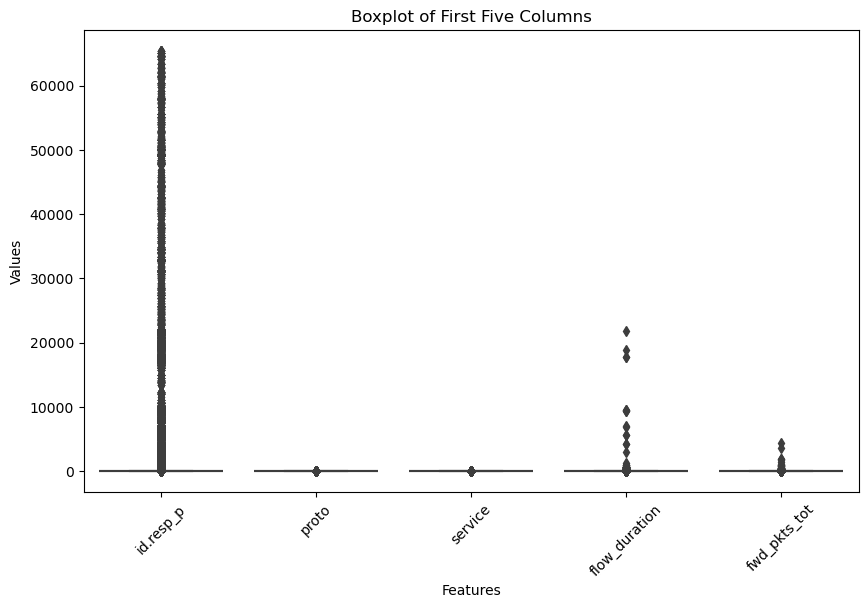

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the first five columns of the DataFrame
first_five_columns = data.iloc[:, :5]

# Plot boxplots for the selected columns
plt.figure(figsize=(10, 6))
sns.boxplot(data=first_five_columns)
plt.title("Boxplot of First Five Columns")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

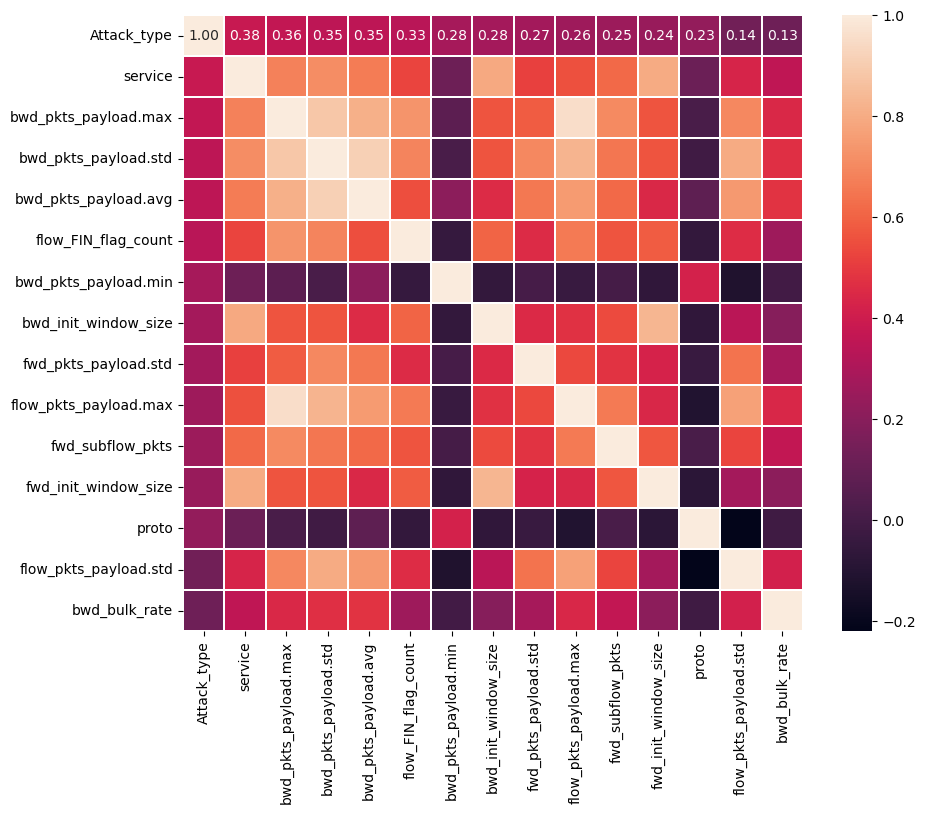

In [62]:
# Select the top 12 most correlated features
top_corr_features = data.corr().nlargest(15, 'Attack_type')['Attack_type'].index
correlation_matrix = data[top_corr_features].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()

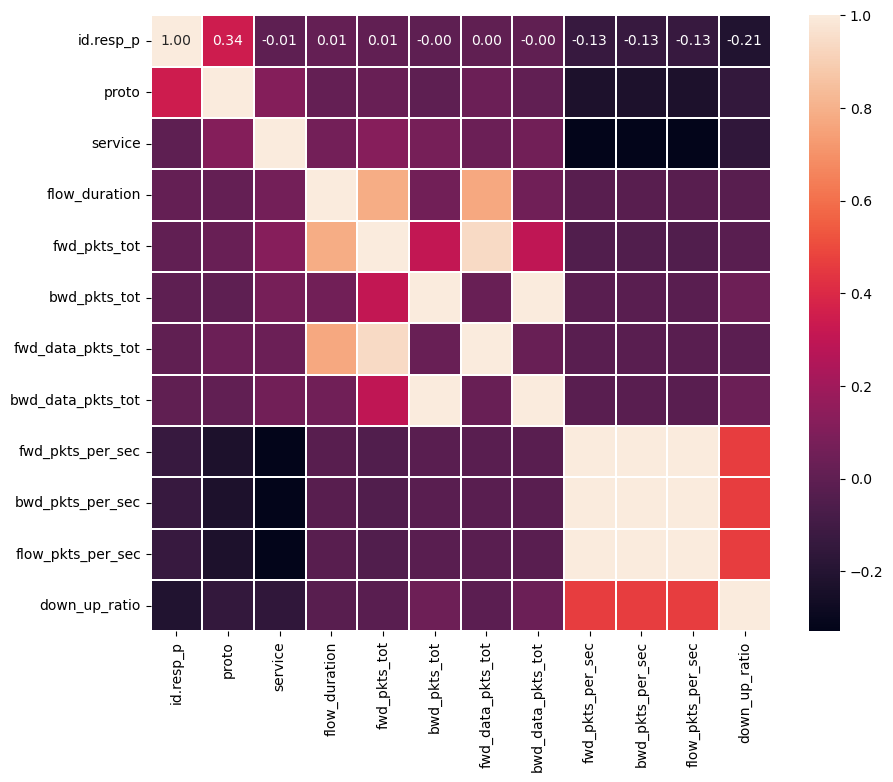

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 0  # Index of the start column
end_column_index = 11  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

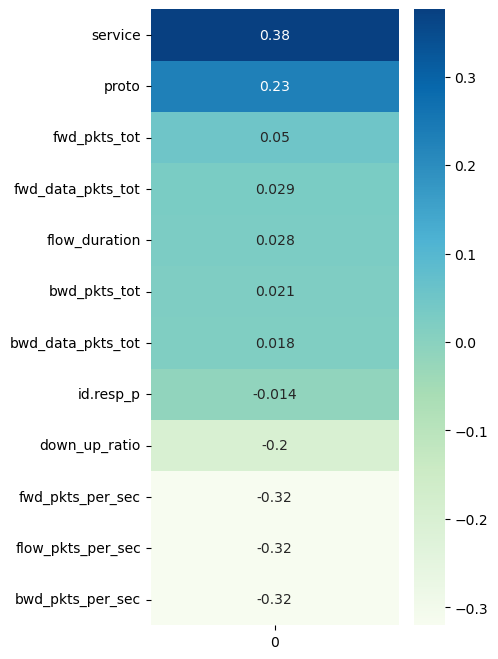

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 0  # Index of the start column
end_column_index = 11  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

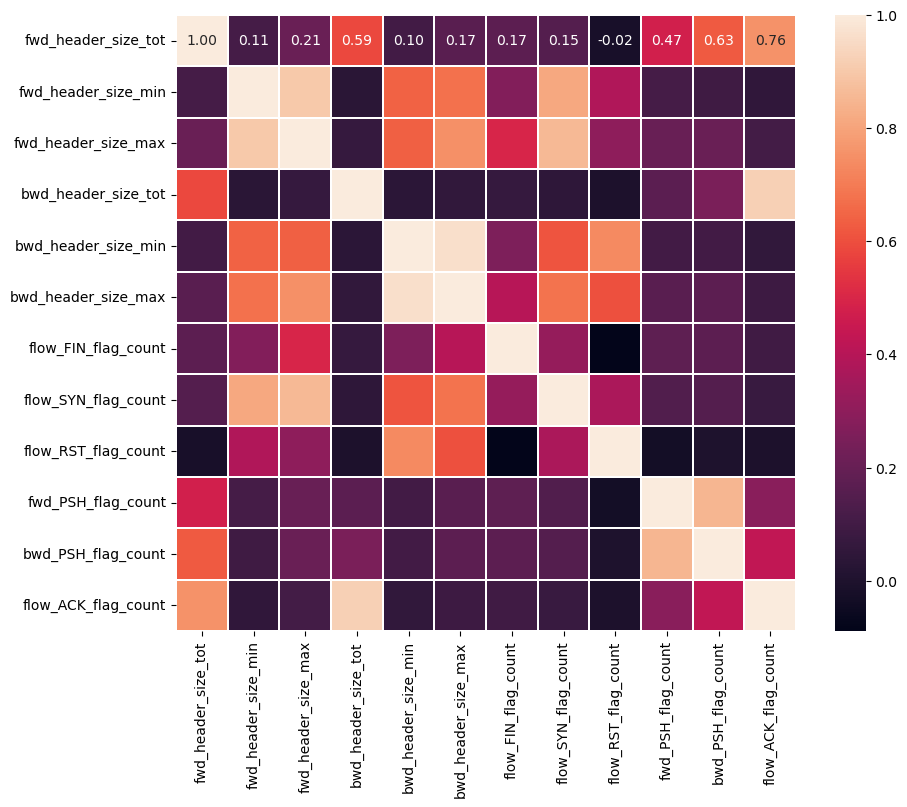

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 12  # Index of the start column
end_column_index = 23  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

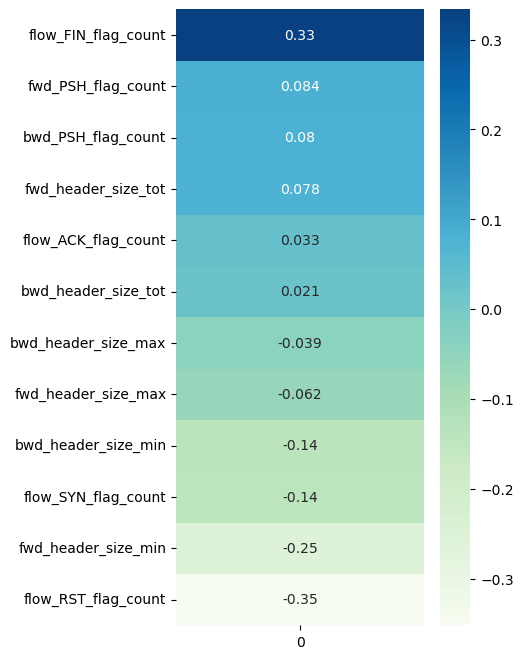

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 12 # Index of the start column
end_column_index = 23  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


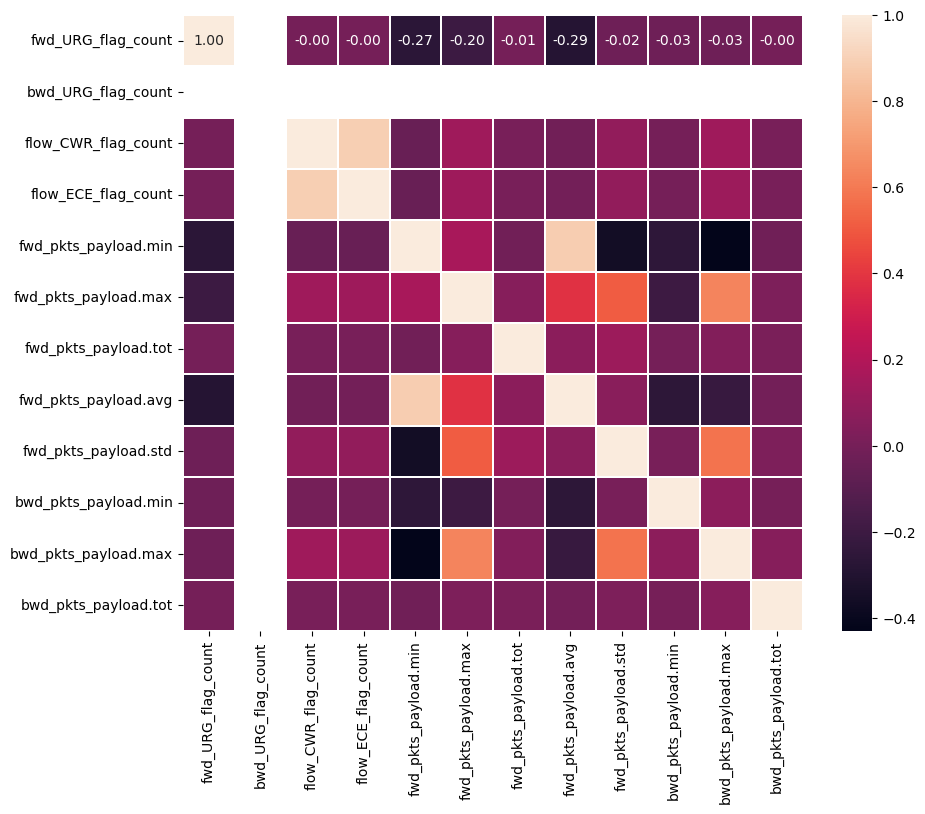

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 24  # Index of the start column
end_column_index = 35  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\ProgramData\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

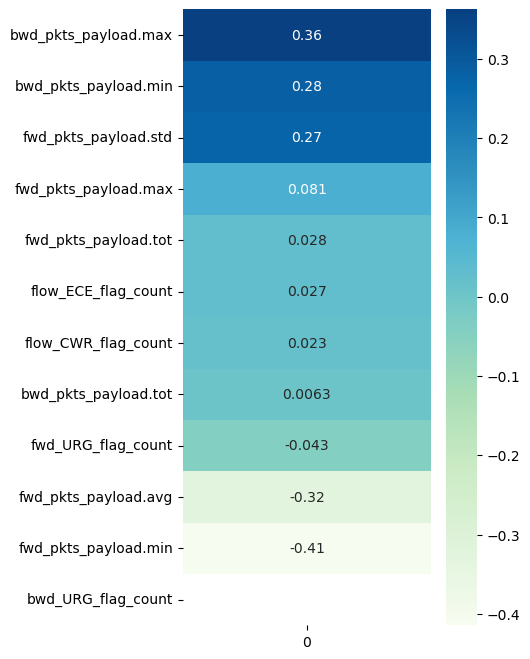

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 24 # Index of the start column
end_column_index = 35  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

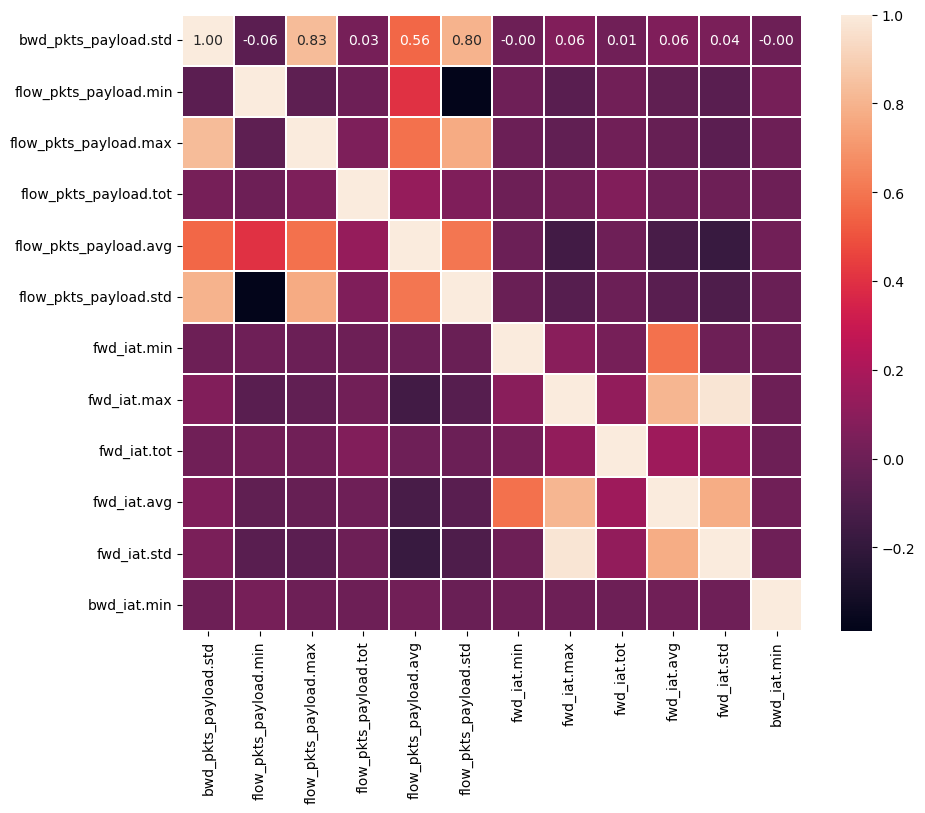

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 37  # Index of the start column
end_column_index = 48  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

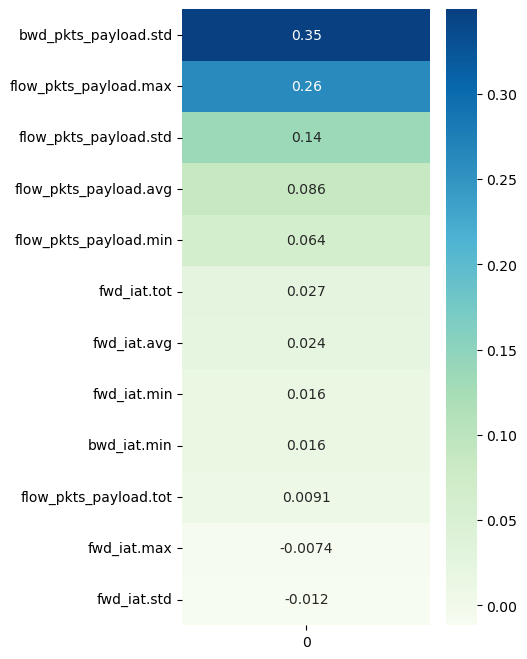

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 37  # Index of the start column
end_column_index = 48  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

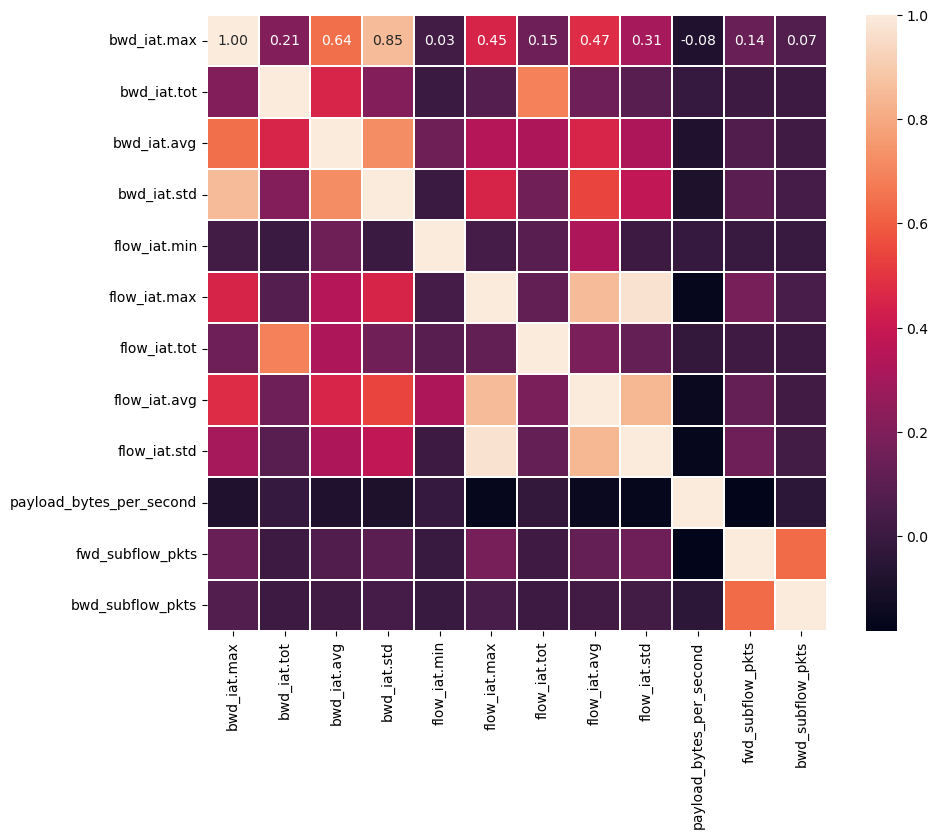

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 49  # Index of the start column
end_column_index = 60  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

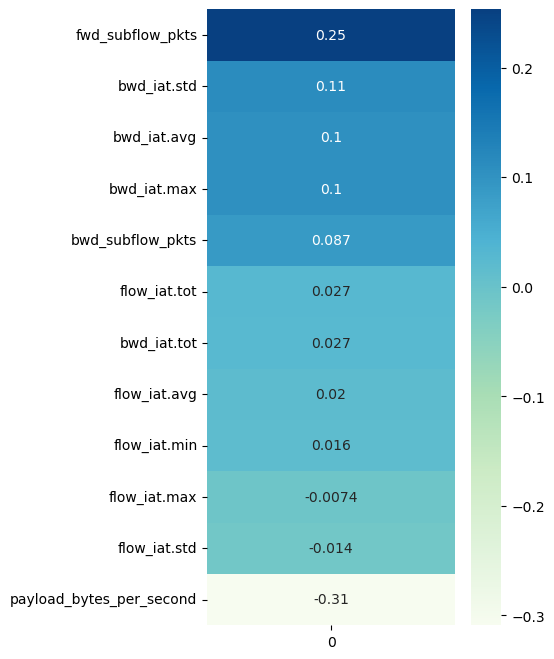

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 49  # Index of the start column
end_column_index =  60 # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

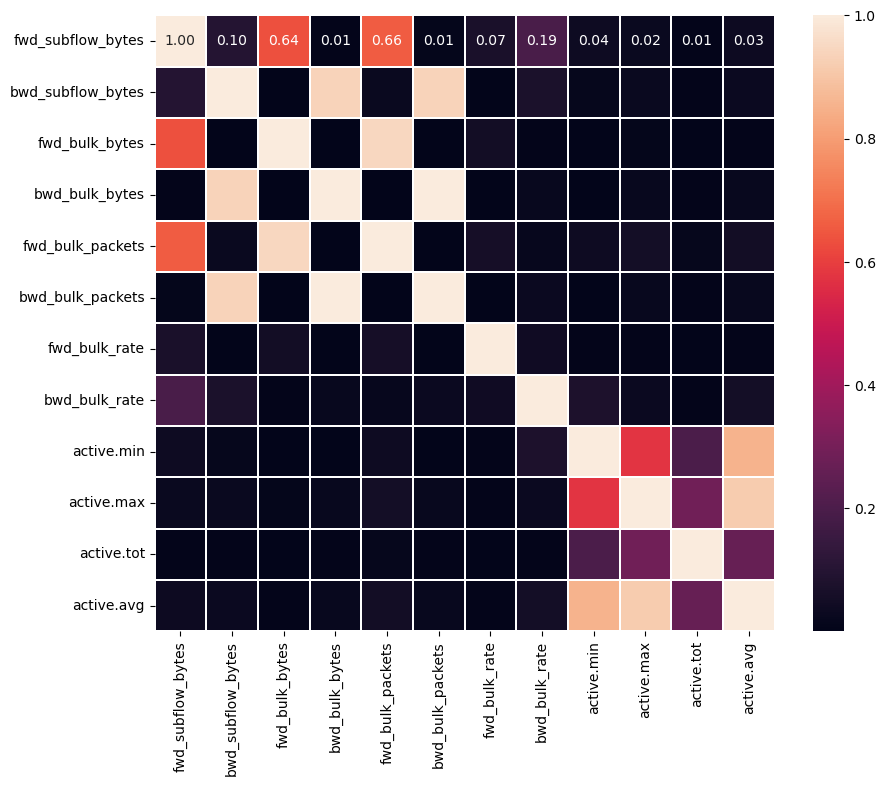

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 61  # Index of the start column
end_column_index = 72  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

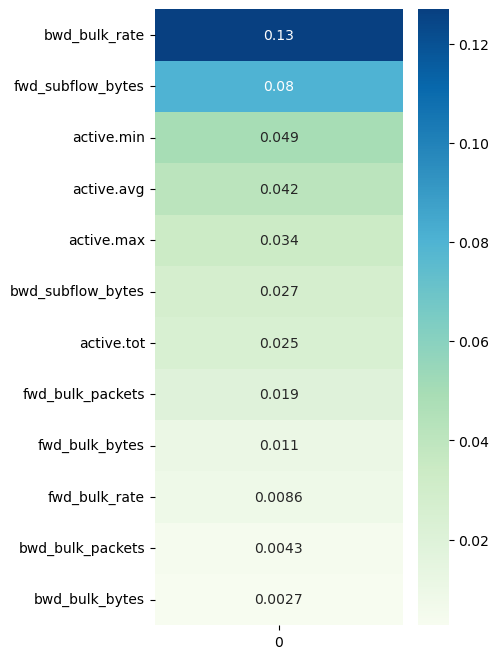

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 61  # Index of the start column
end_column_index = 72  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

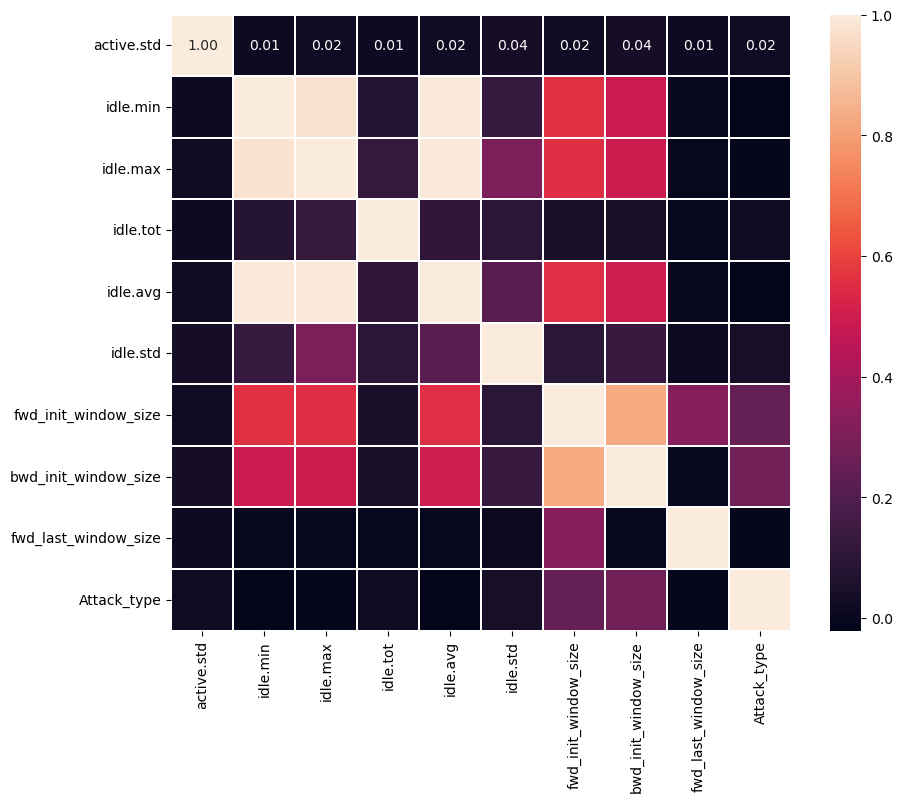

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the range of columns you want to include in the correlation heatmap
start_column_index = 73  # Index of the start column
end_column_index = 82  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Calculate the correlation matrix using the selected columns
correlation_matrix = selected_columns.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=1.2)
plt.show()


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

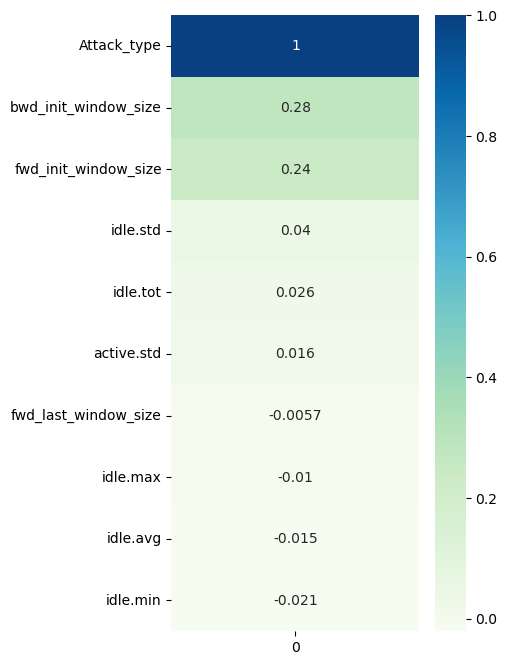

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Define the range of columns you want to include in the correlation heatmap
start_column_index = 73  # Index of the start column
end_column_index = 82  # Index of the end column

# Select the columns within the specified range
selected_columns = data.iloc[:, start_column_index:end_column_index+1]  # Adding 1 to end_column_index to include the end column

# Create a correlation matrix with target variable
corr_with_target = selected_columns.corrwith(data['Attack_type'])

# Sort features by correlation with target variable
corr_with_target = corr_with_target.sort_values(ascending=False)

# Plot the heatmap
plt.figure(figsize=(4, 8))
sns.heatmap(corr_with_target.to_frame(), cmap='GnBu', annot=True)
plt.title

In [23]:
# feature_cols = ['id.orig_p','id.resp_p','proto','service','flow_duration','fwd_pkts_tot','bwd_pkts_tot','fwd_data_pkts_tot','bwd_data_pkts_tot','fwd_pkts_per_sec','bwd_pkts_per_sec','flow_pkts_per_sec','down_up_ratio','fwd_header_size_tot','fwd_header_size_min','fwd_header_size_max','bwd_header_size_tot','bwd_header_size_min','bwd_header_size_max','flow_FIN_flag_count','flow_SYN_flag_count','flow_RST_flag_count','flow_PSH_flag_count','bwd_PSH_flag_count','flow_ACK_flag_count','flow_URG_flag_count','bwd_URG_flag_count','flow_CWR_flag_count','flow_ECE_flag_count','fwd_pkts_payload.min,'fwd_pkts_payload.max','fwd_pkts_payload.tot','fwd_pkts_payload.avg','fwd_pkts_payload.std','bwd_pkts_payload.min','bwd_pkts_payload.max','bwd_pkts_payload.tot','bwd_pkts_payload.avg','bwd_pkts_payload.std','flow_pkts_payload.min','flow_pkts_payload.max','flow_pkts_payload.tot','flow_pkts_payload.avg','flow_pkts_payload.std','fwd_iat.min','fwd_iat.max','fwd_iat.tot','fwd_iat.avg','fwd_iat.std','bwd_iat.min','bwd_iat.max','bwd_iat.tot','bwd_iat.avg','bwd_iat.std','flow_iat.min','flow_iat.max','flow_iat.tot','flow_iat.avg','flow_iat.std','payload_bytes_per_second','fwd_subflow_pkts','bwd_subflow_pkts','fwd_subflow_bytes','bwd_subflow_bytes','fwd_bulk_bytes','bwd_bulk_bytes','fwd_bulk_packets','bwd_bulk_packets','fwd_bulk_rate','bwd_bulk_rate','active.min','active.max','active.tot','active.avg','active.std','idle.min','idle.max','idle.tot','idle.avg','idle.std','fwd_init_window_size','bwd_init_window_size','fwd_last_window_size','Attack_type']
feature_cols = ['id.resp_p', 'proto', 'service', 'flow_duration', 'fwd_pkts_tot', 'bwd_pkts_tot', 'fwd_data_pkts_tot',
           'bwd_data_pkts_tot', 'fwd_pkts_per_sec', 'bwd_pkts_per_sec', 'flow_pkts_per_sec', 'down_up_ratio', 'fwd_header_size_tot',
           'fwd_header_size_min', 'fwd_header_size_max', 'bwd_header_size_tot', 'bwd_header_size_min', 'bwd_header_size_max',
           'flow_FIN_flag_count', 'flow_SYN_flag_count', 'flow_RST_flag_count', 'flow_PSH_flag_count', 'bwd_PSH_flag_count',
           'flow_ACK_flag_count', 'flow_URG_flag_count', 'bwd_URG_flag_count', 'flow_CWR_flag_count', 'flow_ECE_flag_count',
           'fwd_pkts_payload.min', 'fwd_pkts_payload.max', 'fwd_pkts_payload.tot', 'fwd_pkts_payload.avg', 'fwd_pkts_payload.std',
           'bwd_pkts_payload.min', 'bwd_pkts_payload.max', 'bwd_pkts_payload.tot', 'bwd_pkts_payload.avg', 'bwd_pkts_payload.std',
           'flow_pkts_payload.min', 'flow_pkts_payload.max', 'flow_pkts_payload.tot', 'flow_pkts_payload.avg', 'flow_pkts_payload.std',
           'fwd_iat.min', 'fwd_iat.max', 'fwd_iat.tot', 'fwd_iat.avg', 'fwd_iat.std', 'bwd_iat.min', 'bwd_iat.max', 'bwd_iat.tot',
           'bwd_iat.avg', 'bwd_iat.std', 'flow_iat.min', 'flow_iat.max', 'flow_iat.tot', 'flow_iat.avg', 'flow_iat.std',
           'payload_bytes_per_second', 'fwd_subflow_pkts', 'bwd_subflow_pkts', 'fwd_subflow_bytes', 'bwd_subflow_bytes',
           'fwd_bulk_bytes', 'bwd_bulk_bytes', 'fwd_bulk_packets', 'bwd_bulk_packets', 'fwd_bulk_rate', 'bwd_bulk_rate',
           'active.min', 'active.max', 'active.tot', 'active.avg', 'active.std', 'idle.min', 'idle.max', 'idle.tot',
           'idle.avg', 'idle.std', 'fwd_init_window_size', 'bwd_init_window_size', 'fwd_last_window_size', 'Attack_type']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [25]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [26]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
y_pred=clf.predict(X_test)

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(n_jobs=-1, random_state=15)

# Train the Random Forest classifier using training data
random_forest.fit(X_train, y_train)

# Evaluation
y_pred_test = random_forest.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


Accuracy: 0.8549382716049383
Precision: 0.7897659213978699
Recall: 0.8549382716049383
True Positives (TP): 31578
True Negatives (TN): -5358
False Positives (FP): 5358
False Negatives (FN): 5358
Confusion Matrix:
 [[    0     0  2375     0     0     0     0     0     0     0     0     0]
 [    0     0   148     0     0     0     0     0     0     0     0     0]
 [    0     0 28168     0     0     2    44     2     0    93    23     0]
 [    0     0     6     1     0     0     2     0     0     0     0     0]
 [    0     0     1     0  1035     0     0     0     0     0   236     0]
 [    0     0     0     0     0     0     3     0     0     0     0     0]
 [    0     0    42     2     0     1   486    64     4    11     0     0]
 [    0     0     5     0     0     0    87   124    75    16     0     0]
 [    0     0     0     0     0     0     9    23   566   161     0     0]
 [    0     0    82     0     0     0    21     7   271   224     0     0]
 [    0     0  1190     0   280     0

In [29]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,    
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


RandomForestClassifier(max_features='auto', n_jobs=1)

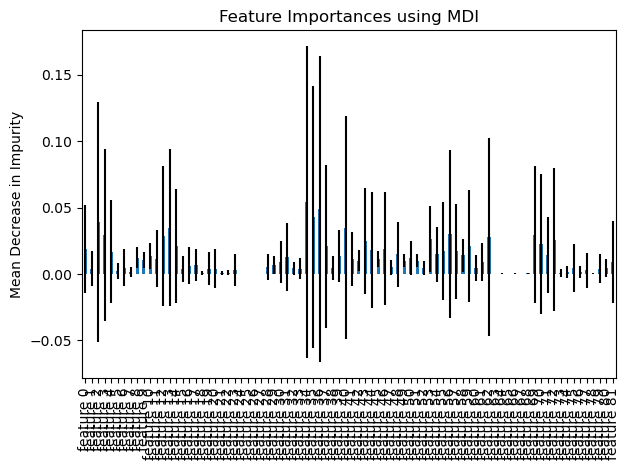

In [30]:
#Step 3: Compute Feature Importances
#We'll compute feature importances based on the mean decrease in impurity (MDI). These importances represent the average impurity decrease within each tree.

# Compute feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)

# Plot the impurity-based importance
feature_names = [f"feature {i}" for i in range(X.shape[1])]
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
fig.tight_layout()
plt.show()

In [31]:
#LOGISTIC REGRESSION

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the Logistic Regression classifier
logistic_regression = LogisticRegression(random_state=15, solver='liblinear')

# Train the Logistic Regression classifier using training data
logistic_regression.fit(X_train, y_train)

# Evaluation
y_pred_test = logistic_regression.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


Accuracy: 0.7786712150747238
Precision: 0.6719778426213001
Recall: 0.7786712150747238
True Positives (TP): 28761
True Negatives (TN): -8175
False Positives (FP): 8175
False Negatives (FN): 8175
Confusion Matrix:
 [[    0     0  2375     0     0     0     0     0     0     0     0     0]
 [    0     0   148     0     0     0     0     0     0     0     0     0]
 [    0     0 28304     0     5     0     1     0     1    18     3     0]
 [    0     0     4     0     0     0     0     0     0     1     4     0]
 [   91     0   813     0   128     2     0     1    31   108    98     0]
 [    0     0     2     0     0     0     0     0     0     0     1     0]
 [    1     0   600     0     4     0     0     0     2     3     0     0]
 [    0     0   266     0     0     0     0     0    41     0     0     0]
 [    0     0   563     0     0     0     0     0   194     2     0     0]
 [    0     0   477     0     8     0     1     0    96    13    10     0]
 [   32     0  2163     0    81     0

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [33]:
#NAIVE BAYES 

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the Naive Bayes classifier
naive_bayes = GaussianNB()

# Train the Naive Bayes classifier using training data
naive_bayes.fit(X_train, y_train)

# Evaluation
y_pred_test = naive_bayes.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


Accuracy: 0.052252544942603424
Precision: 0.8018111726733455
Recall: 0.052252544942603424
True Positives (TP): 1930
True Negatives (TN): -35006
False Positives (FP): 35006
False Negatives (FN): 35006
Confusion Matrix:
 [[ 1153  1222     0     0     0     0     0     0     0     0     0     0]
 [   10   138     0     0     0     0     0     0     0     0     0     0]
 [14185 12654    62    25  1149     3    85   146     4    19     0     0]
 [    0     0     0     1     1     0     2     2     0     3     0     0]
 [  588     0     4    22   138    82    50   359    11    18     0     0]
 [    0     0     0     0     2     0     0     1     0     0     0     0]
 [   31     0     0     2     4     1    12   555     2     3     0     0]
 [    4     0     0     0     0     1     0   301     1     0     0     0]
 [    5     0     0     0     0     0     0   654   100     0     0     0]
 [   20     0     0     2     6     2     6   511    34    24     0     0]
 [  886  1076     1     6   119

In [35]:
#KNN MODEL

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
# Train the model
knn_model.fit(X_train, y_train)
# Make predictions on the test set
y_pred = knn_model.predict(X_test)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the KNeighborsClassifier
knn_classifier = KNeighborsClassifier()

# Train the KNeighborsClassifier using training data
knn_classifier.fit(X_train, y_train)

# Evaluation
y_pred_test = knn_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


Accuracy: 0.8389376218323586
Precision: 0.7717964087416063
Recall: 0.8389376218323586
True Positives (TP): 30987
True Negatives (TN): -5949
False Positives (FP): 5949
False Negatives (FN): 5949
Confusion Matrix:
 [[    0     0  2373     0     0     0     0     0     0     0     2     0]
 [    0     0   148     0     0     0     0     0     0     0     0     0]
 [    0     0 28136     0    20     0    69    10    21    41    35     0]
 [    0     0     4     0     0     0     1     0     0     1     3     0]
 [    0     0    28     1   975     0     4     1     5     6   252     0]
 [    0     0     2     0     0     0     0     0     1     0     0     0]
 [    0     0    55     1    16     2   339    64    83    47     3     0]
 [    0     0    11     0     3     0   127    40    98    27     1     0]
 [    0     0    16     0     2     0   117    61   429   134     0     0]
 [    0     0    53     0    11     0    92    25   256   153    15     0]
 [    0     0  1196     0   316     0

In [38]:
#SVC MODEL

In [39]:
from sklearn.svm import SVC
# SVC model
svc_model = SVC(random_state=42)
# Train the model
svc_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_model.predict(X_test)


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the Support Vector Classifier
svc_classifier = SVC()

# Train the SVC classifier using training data
svc_classifier.fit(X_train, y_train)

# Evaluation
y_pred_test = svc_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


In [ ]:
#XGBOOST MODEL

In [ ]:
import xgboost as xgb
#from sklearn.metrics import classification_report, accuracy_score

# Convert the float labels to integers
y_train = y_train.astype(int)

# XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Train the XGBoost classifier using training data
xgb_classifier.fit(X_train, y_train)

# Evaluation
y_pred_test = xgb_classifier.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


In [ ]:
#LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression model
linear_model = LinearRegression()

# Train the model
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error for Linear Regression:", mse)
print("R-squared (Coefficient of Determination) for Linear Regression:", r2)


In [ ]:
#DECISION TREE

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Decision Tree model
tree_model = DecisionTreeClassifier(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = tree_model.predict(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Instantiate the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=15)

# Train the Decision Tree classifier using training data
decision_tree.fit(X_train, y_train)

# Evaluation
y_pred_test = decision_tree.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred_test)
precision = precision_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)
recall = recall_score(y_true=y_test, y_pred=y_pred_test, average='weighted', zero_division=0)

# Confusion Matrix
CM = confusion_matrix(y_true=y_test, y_pred=y_pred_test)

# Extract TP, TN, FP, FN from confusion matrix
TP = np.diag(CM).sum()
FP = CM.sum(axis=0).sum() - TP
FN = CM.sum(axis=1).sum() - TP
TN = CM.sum().sum() - (TP + FP + FN)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("True Positives (TP):", TP)
print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("Confusion Matrix:\n", CM)


In [ ]:
#feature_imp

In [ ]:
#%matplotlib inline

In [ ]:
# Creating a bar plot
#plt.figure()


In [ ]:
#sns.barplot(x=feature_imp, y=feature_imp.index)

In [ ]:
# Add labels to your graph
#plt.xlabel('Feature Importance Score')


In [ ]:
#plt.ylabel('Features')

In [ ]:
#plt.title("Visualizing Important Features in dataset 1")

In [ ]:
#plt.show()